In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
data = loadmat("project4data1.mat")

In [3]:
X = data["X"]
y = data["y"]
m = y.shape[0]

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

In [6]:
m

5000

In [7]:
print(X.shape, y.shape)

(5000, 400) (5000, 1)


Text(0.5, 1.0, '[5]')

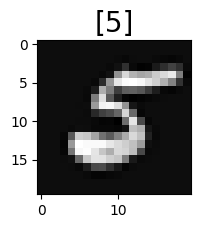

In [8]:
idx = 2600

plt.figure(figsize= (20, 2))

plt.imshow(np.reshape(X[idx], (20, 20)).T, cmap= "gray")
plt.title(str(y[idx]), fontsize = 20)

In [9]:
print("shape of X:", X.shape)
print("shape of X[idx]:", X[idx].shape)
print("shape of y:", y.shape)


shape of X: (5000, 400)
shape of X[idx]: (400,)
shape of y: (5000, 1)


In [10]:
X = np.transpose(X)
X.shape

(400, 5000)

In [11]:
y = np.transpose(y)
y.shape

(1, 5000)

In [12]:
X = np.concatenate([np.ones((1, m)), X], axis= 0)
X.shape

(401, 5000)

In [13]:
y[0,1600]

3

In [14]:
y_onehot = np.eye(10)[y].T
print(y)
print(y_onehot.shape)

[[0 0 0 ... 9 9 9]]
(10, 5000, 1)


In [15]:
y_onehot = y_onehot[:,:,0]
print(y_onehot.shape)


(10, 5000)


In [16]:
y[:,4995:5000]

array([[9, 9, 9, 9, 9]], dtype=uint8)

In [17]:
y_onehot[:, 4995:5000]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

In [18]:
def sigmoid(x):
  g = 1 / (1 + np.exp(-x))
  return g

In [19]:
def nnCostGrad(X, y_onehot, theta_1, theta_2, lambda_):
  m = X.shape[1]
  sum_Cost_m = 0
  theta_1_temp = theta_1.copy()
  theta_2_temp = theta_2.copy()
  theta_1_grad = np.zeros(theta_1.shape)
  theta_2_grad = np.zeros(theta_2.shape)
  for i in range(m):
    a_1 = X[:, i]
    z_2 = np.matmul(theta_1_temp, a_1)
    a_2 = sigmoid(z_2)
    a_2 = np.concatenate([np.ones((1)), a_2], axis= 0)
    z_3 = np.matmul(theta_2_temp, a_2)
    a_3 = sigmoid(z_3)
    sum_Cost_m = sum_Cost_m + y_onehot[:, i] * np.log(a_3) + (1 - y_onehot[:, i]) * np.log(1 - a_3)
    delta_3 = a_3 - y_onehot[:, i]
    delta_2 = np.matmul(theta_2_temp.T, delta_3) * (a_2 * (1 - a_2))
    delta_2 = delta_2[1:]
    delta_2 = delta_2.reshape((delta_2.shape[0], 1))
    a_1 = a_1.reshape((a_1.shape[0], 1))
    theta_1_grad = theta_1_grad + np.matmul(delta_2, a_1.T)
    delta_3 = delta_3.reshape((delta_3.shape[0], 1))
    a_2 = a_2.reshape((a_2.shape[0], 1))
    theta_2_grad = theta_2_grad + np.matmul(delta_3, a_2.T)

  sum_Cost_m_k = np.sum(sum_Cost_m, axis= 0)
  cost = (-1 / m) * sum_Cost_m_k + (lambda_ / (2 * m)) * (np.sum(theta_1_temp[:, 1:] ** 2) + np.sum(theta_2_temp[:, 1:] ** 2))
  theta_1_grad[:, 1:] = theta_1_grad[:, 1:] + lambda_ * theta_1_temp[:, 1:]
  theta_2_grad[:,1:] = theta_2_grad[:, 1:] + lambda_ * theta_2_temp[:, 1:]

  theta_1_grad = theta_1_grad / m
  theta_2_grad = theta_2_grad / m

  return cost, theta_1_grad, theta_2_grad

In [20]:
def train(X, y_onehot, nnCostGrad, theta_1, theta_2, epochs, lr, lambda_):
  J_history=[]
  for epoch in range(epochs):
    cost, theta_1_grad, theta_2_grad = nnCostGrad(X, y_onehot, theta_1, theta_2, lambda_)
    theta_1 = theta_1 - lr * theta_1_grad
    theta_2 = theta_2 - lr * theta_2_grad
    J_history.append(cost)
    print("cost at epoch {} : {}".format(epoch, cost))
  return theta_1, theta_2, J_history

In [21]:
in_layer_size = 400
hid_layer_size = 25
out_layer_size = 10
eps = 0.1
theta_1 = np.random.rand(hid_layer_size, in_layer_size + 1) * (2 * eps) - eps
theta_2 = np.random.rand(out_layer_size, hid_layer_size + 1) * (2 * eps) - eps

In [22]:
theta_1_new, theta_2_new, J_history = train(X, y_onehot,
                                            nnCostGrad,
                                            theta_1,
                                            theta_2,
                                            epochs= 800,
                                            lr= 0.9,
                                            lambda_= 1)

cost at epoch 0 : 6.7065487316275245
cost at epoch 1 : 3.419342990845342
cost at epoch 2 : 3.249752037833755
cost at epoch 3 : 3.2425128437269617
cost at epoch 4 : 3.2365644004791
cost at epoch 5 : 3.230681636937536
cost at epoch 6 : 3.2244943313726857
cost at epoch 7 : 3.2178413195877957
cost at epoch 8 : 3.2106129131851597
cost at epoch 9 : 3.202709909927796
cost at epoch 10 : 3.1940334054690545
cost at epoch 11 : 3.1844826326526534
cost at epoch 12 : 3.1739550294332965
cost at epoch 13 : 3.1623471400954095
cost at epoch 14 : 3.1495560565461593
cost at epoch 15 : 3.135481368324745
cost at epoch 16 : 3.1200276327428114
cost at epoch 17 : 3.1031073522297214
cost at epoch 18 : 3.0846443928657017
cost at epoch 19 : 3.064577709055358
cost at epoch 20 : 3.042865162847031
cost at epoch 21 : 3.0194871531928142
cost at epoch 22 : 2.9944497163906263
cost at epoch 23 : 2.9677867444322703
cost at epoch 24 : 2.9395610108692645
cost at epoch 25 : 2.909863798801474
cost at epoch 26 : 2.878813077253

In [23]:
def predict(theta_1, theta_2, X):
  m = X.shape[1]
  z_2 = np.matmul(theta_1, X)
  a_2 = sigmoid(z_2)
  a_2 = np.concatenate([np.ones((1, m)), a_2], axis= 0)
  z_3 = np.matmul(theta_2, a_2)
  a_3 = sigmoid(z_3)
  return a_3

In [24]:
outputs = predict(theta_1_new, theta_2_new, X)
print(outputs.shape)
predicted_digit = np.argmax(outputs, axis= 0)
print("predicted digit: ", predicted_digit)

(10, 5000)
predicted digit:  [0 0 0 ... 9 9 9]


In [25]:
print(predicted_digit)

[0 0 0 ... 9 9 9]


In [26]:
print('Training Set Accuracy: %f' % (np.mean(predicted_digit == y) * 100))

Training Set Accuracy: 94.700000


Text(0.5, 1.0, '6')

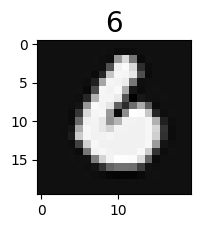

In [27]:
idx = 3200

plt.figure(figsize= (20, 2))

plt.imshow(np.reshape(X[1:, idx], (20, 20)).T, cmap= "gray")
plt.title(str(y[0, idx]), fontsize = 20)